# Future project

This will be very helpful if I decide to take the RNN approach to determining notes and instrument

Ideally there just needs to be 3 or 4 different samples of an instrument to learn from.

My assumption is that by compressing and expanding these samples temporally we can arrive at 108 each (possibily more if I include making louder/softer or adding a tiny bit of noise)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
%run ../classes/music.py

In [4]:
music = Music()
music.read('../sounds/wav/cello_pluck/expert/bach.wav')

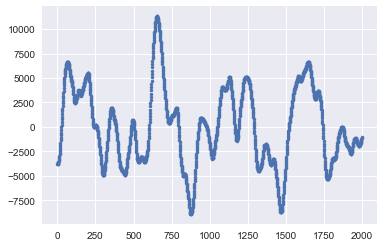

In [15]:
seg = music.chan1[398000:400000]
plt.plot(seg, ".")

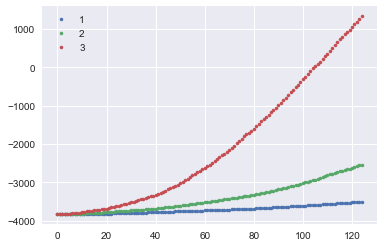

In [52]:
def change_speed(lst, freq):
    ret = list()
    x = 0
    while x + 1 < len(lst):
        i = int(x)
        start = lst[i]
        end = lst[i + 1]
        diff = end - start
        ret.append(start + (diff * (x % 1)))
        x += freq
    return ret

def get_octaves(seg, curr_octave):
    lower_num = curr_octave - 1
    higher_num = 8 - curr_octave
    ret = list()
    for i in range(lower_num+1, 1, -1):
        ret.append((change_speed(seg, (1/2)**(i)), lower_num-i+2))
    ret.append((seg, curr_octave))
    for i in range(1, higher_num+1):
        ret.append( (change_speed(seg, (2)**(i)), i+curr_octave) )
    return ret

def clip_length(seg):
    min_length = min([len(seg[0]) for seg in segs])
    rets = [(seg[0][:min_length], seg[1]) for seg in segs]
    return rets
        
segs = get_octaves(seg, 4)
segs = clip_length(segs)

for s, octave in segs[:3]:
    plt.plot(s, ".", label=octave)

_ = plt.legend()